In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 115s 1us/step


In [3]:
# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

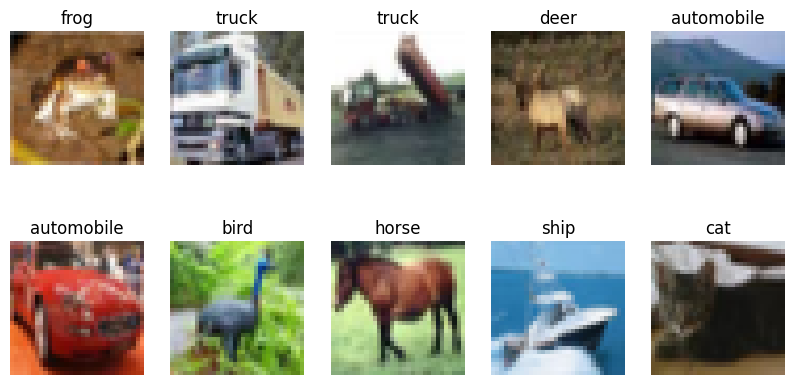

In [5]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [6]:
#Custom CNN Model

In [7]:
# Define a custom CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\ARFA TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.3565 - loss: 1.7259 - val_accuracy: 0.5648 - val_loss: 1.2101
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5990 - loss: 1.1377 - val_accuracy: 0.6551 - val_loss: 0.9918
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.6686 - loss: 0.9348 - val_accuracy: 0.6696 - val_loss: 0.9659
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.7079 - loss: 0.8187 - val_accuracy: 0.6984 - val_loss: 0.8593
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7431 - loss: 0.7310 - val_accuracy: 0.7029 - val_loss: 0.8767
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7710 - loss: 0.6501 - val_accuracy: 0.7142 - val_loss: 0.8454
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7979 - loss: 0.5768 - val_accuracy: 0.7180 - val_loss: 0.8631
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8175 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.7161 - loss: 0.9530
Test Accuracy: 0.7161


In [11]:
#Using Pretrained Models (ResNet & MobileNetV2)

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [13]:
# Load ResNet50 (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 52s 1us/step


In [14]:
# Freeze base model layers
base_model.trainable = False

In [15]:
# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

In [16]:

# Create final model
resnet_model = Model(inputs=base_model.input, outputs=output_layer)

In [17]:
# Compile
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [18]:
# Train
history_resnet = resnet_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 477s 294ms/step - accuracy: 0.2086 - loss: 2.1648 - val_accuracy: 0.3079 - val_loss: 1.8948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 463s 296ms/step - accuracy: 0.3050 - loss: 1.9055 - val_accuracy: 0.3274 - val_loss: 1.8509
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 487s 286ms/step - accuracy: 0.3336 - loss: 1.8425 - val_accuracy: 0.3377 - val_loss: 1.8245
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 487s 276ms/step - accuracy: 0.3453 - loss: 1.8075 - val_accuracy: 0.3701 - val_loss: 1.7528
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 439s 275ms/step - accuracy: 0.3598 - loss: 1.7703 - val_accuracy: 0.3681 - val_loss: 1.7644
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 448s 279ms/step - accuracy: 0.3703 - loss: 1.7490 - val_accuracy: 0.3836 - val_loss: 1.7198
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 432s 276ms/step - accuracy: 0.3764 - loss: 1.7389 - val_accuracy: 0.3852 - val_loss: 1.7119
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 267ms/step - ac

In [19]:
# Evaluate
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print(f"ResNet50 Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - accuracy: 0.3938 - loss: 1.7099 
ResNet50 Test Accuracy: 0.3888


In [20]:
#MobileNetV2 Model

In [21]:
from tensorflow.keras.applications import MobileNetV2

In [22]:
# Load MobileNetV2 (without top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

C:\Users\ARFA TECH\AppData\Local\Temp\ipykernel_12372\3990415591.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step 


In [23]:
# Freeze base model layers
base_model.trainable = False

In [24]:
# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

In [25]:
# Create final model
mobilenet_model = Model(inputs=base_model.input, outputs=output_layer)

In [26]:
# Compile
mobilenet_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [27]:
# Train
history_mobilenet = mobilenet_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 72ms/step - accuracy: 0.2710 - loss: 2.0150 - val_accuracy: 0.3221 - val_loss: 1.8638
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.3303 - loss: 1.8333 - val_accuracy: 0.3377 - val_loss: 1.8250
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.3532 - loss: 1.7884 - val_accuracy: 0.3456 - val_loss: 1.8103
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.3604 - loss: 1.7548 - val_accuracy: 0.3497 - val_loss: 1.8012
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.3703 - loss: 1.7350 - val_accuracy: 0.3602 - val_loss: 1.7942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.3744 - loss: 1.7198 - val_accuracy: 0.3561 - val_loss: 1.7929
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.3826 - loss: 1.6954 - val_accuracy: 0.3545 - val_loss: 1.7931
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.39

In [28]:
# Evaluate
test_loss, test_acc = mobilenet_model.evaluate(x_test, y_test)
print(f"MobileNetV2 Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.3605 - loss: 1.7838
MobileNetV2 Test Accuracy: 0.3575


In [29]:
#Visualization

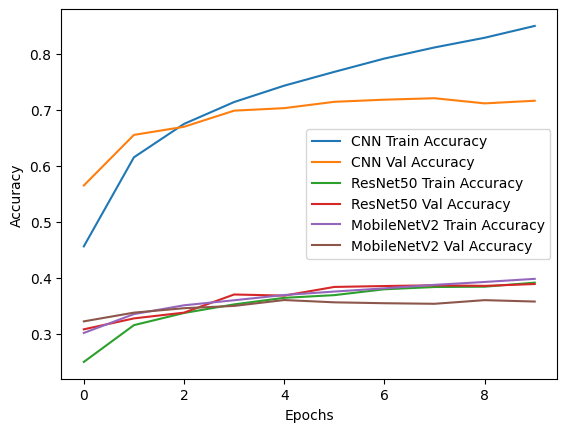

In [30]:
plt.plot(history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val Accuracy')
plt.plot(history_mobilenet.history['accuracy'], label='MobileNetV2 Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2 Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()